### 1. Word Frequency

#### The TED dataset "ted_main.csv" contains information about all audio-video recordings of TED Talks uploaded to the official TED.com website until September 21st, 2017,including number of views, number of comments, short descriptions, speaker names and titles. 


#### a.Write code to obtain the following information of the words and tokens that appeared in the description of all talks (in the 'description' column in the dataset) after processing the text in the specified ways.

In [372]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import PorterStemmer
import nltk

In [393]:
ted_tb=pd.read_csv("C:/Users/Rai Chiang/Desktop/DePaul Course/csc575/CSC575 Assignment #2 Rae Chiang/ted_main.csv",encoding='utf-8')

In [411]:
lower=[]
for i in range(len(ted_tb.description)):
    lower.append(word_tokenize(ted_tb.description[i].lower()))

In [419]:
#total number of token
stemmer=nltk.PorterStemmer()
all1=[]
for i in lower:
    for t in i:
        if t not in stopwords.words("english"):
            if t.isalpha():
                all1.append(stemmer.stem(t))
            
    

In [421]:
len(all1)    

74126

In [422]:
#total number of vocabulary
vocab_dict=nltk.FreqDist(all1)
len(vocab_dict)

10589

In [398]:
top_lst=sorted(vocab_dict.items(), key=lambda x: x[1], reverse=True)[:21]
top_lst

[('talk', 880),
 ('us', 643),
 ('world', 527),
 ('say', 453),
 ('make', 449),
 ('share', 444),
 ('new', 415),
 ('show', 371),
 ('use', 360),
 ('work', 356),
 ('peopl', 334),
 ('human', 330),
 ('way', 326),
 ('one', 307),
 ('stori', 307),
 ('live', 282),
 ('help', 281),
 ('life', 274),
 ('like', 272),
 ('power', 262),
 ('ted', 254)]

In [399]:
#Percentage of tokens in the dataset that is covered by the top 20 token types
total=[]
for i in top_lst:
    total.append(i[1])

sum(total)/len(all)

0.10963764401154791

In [423]:
#format for Q3


stemmer=nltk.PorterStemmer()
all=[]
for i in lower:
    collection=[]
    for t in i:
        if t not in stopwords.words("english"):
            if t.isalpha():
                collection.append(stemmer.stem(t))
    all.append(collection)
            
    
all2=all

### 2. Word cloud

#### Using the tags associated with talks in the TED dataset, create a word cloud for tags 'climate change' and 'AI'. 

In [185]:
#find out the tags that cover both 'AI' and 'climate change'
for i in range(len(ted_tb.tags)):
    if 'AI' in ted_tb.tags[i]:
        if "climate change" in ted_tb.tags[i]:
            print(i)

51
2478


In [190]:
ted_tb.tags[51]

"['AIDS', 'Africa', 'business', 'choice', 'climate change', 'culture', 'disaster relief', 'economics', 'environment', 'future']"

In [186]:
ted_tb.tags[2478]

"['AI', 'algorithm', 'cities', 'climate change', 'collaboration', 'communication', 'exploration', 'farming', 'future', 'global development', 'global issues', 'humanity', 'innovation', 'motivation', 'pollution', 'potential', 'social change', 'society', 'technology', 'visualizations']"

In [187]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

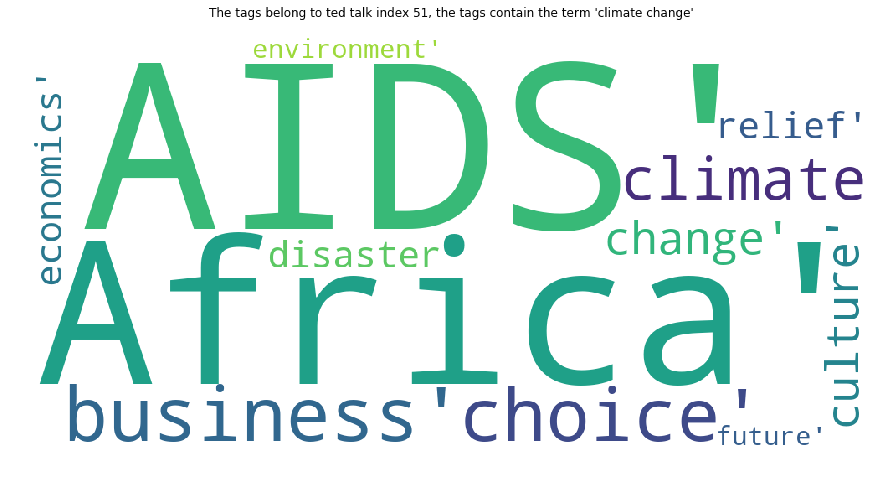

In [193]:
wordcloud = WordCloud(background_color='white',width = 1000, height = 500).generate(ted_tb.tags[51])
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tag_climate_change_AI"+".png", bbox_inches='tight')
plt.title("The tags belong to ted talk index 51, the tags contain the term 'climate change'\n")
plt.show()
plt.close()

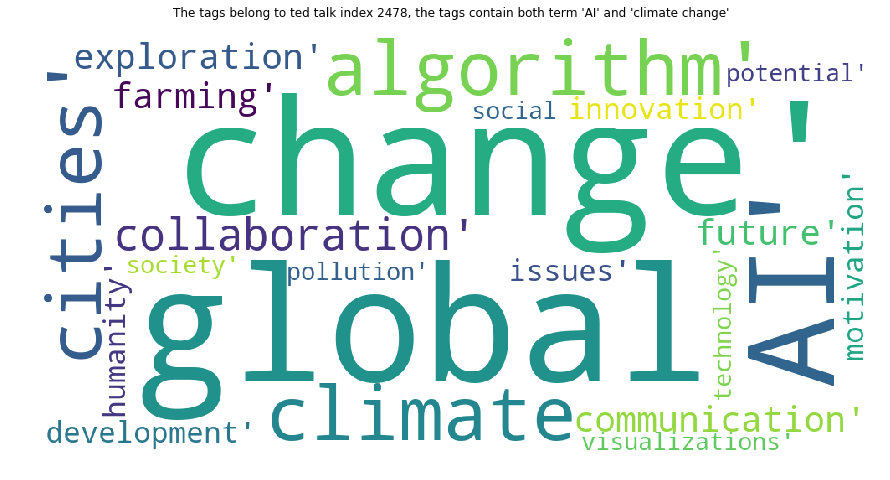

In [188]:
wordcloud = WordCloud(background_color='white',width = 1000, height = 500).generate(ted_tb.tags[2478])
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tag_climate_change_AI"+".png", bbox_inches='tight')
plt.title("The tags belong to ted talk index 2478, the tags contain both term 'AI' and 'climate change'\n")
plt.show()
plt.close()


### 3. Inverted Index

#### Create an inverted index for the TED dataset, using the text processing scheme [C] in the first problem (i.e, with Porter stemming) and the url of the talk as the document name.    The index will consist of the following files:

#### 1. A file that maps each term name to: the term ID and the document frequency.  Assign a series of positive integers to the term names.  Store each term name per line.  Name the file "TED_term_index.csv".  

In [425]:
all2

[['sir',
  'ken',
  'robinson',
  'make',
  'entertain',
  'profoundli',
  'move',
  'case',
  'creat',
  'educ',
  'system',
  'nurtur',
  'rather',
  'undermin',
  'creativ'],
 ['humor',
  'human',
  'exud',
  'inconveni',
  'truth',
  'al',
  'gore',
  'spell',
  'way',
  'individu',
  'address',
  'climat',
  'chang',
  'immedi',
  'buy',
  'hybrid',
  'invent',
  'new',
  'hotter',
  'brand',
  'name',
  'global',
  'warm'],
 ['new',
  'york',
  'time',
  'columnist',
  'david',
  'pogu',
  'take',
  'aim',
  'technolog',
  'worst',
  'offend',
  'provid',
  'encourag',
  'exampl',
  'product',
  'get',
  'right',
  'funni',
  'thing',
  'burst',
  'song'],
 ['emot',
  'charg',
  'talk',
  'activist',
  'majora',
  'carter',
  'detail',
  'fight',
  'environment',
  'justic',
  'south',
  'bronx',
  'show',
  'minor',
  'neighborhood',
  'suffer',
  'flaw',
  'urban',
  'polici'],
 ['never',
  'seen',
  'data',
  'present',
  'like',
  'drama',
  'urgenc',
  'sportscast',
  'stati

In [426]:
#vocabulary
term_lst=sorted(vocab_dict.keys())

In [427]:
#preview the top 10 term list with alphbatic order
term_lst[:10]

['a',
 'aakash',
 'aala',
 'aamodt',
 'aaron',
 'aaronson',
 'ababa',
 'abalon',
 'abandon',
 'abani']

In [428]:
#check the doc_freq
sorted(vocab_dict.items())

[('a', 2),
 ('aakash', 1),
 ('aala', 1),
 ('aamodt', 1),
 ('aaron', 4),
 ('aaronson', 1),
 ('ababa', 1),
 ('abalon', 1),
 ('abandon', 11),
 ('abani', 2),
 ('abdi', 1),
 ('abduct', 1),
 ('abdul', 1),
 ('abe', 1),
 ('abha', 1),
 ('abhor', 1),
 ('abigail', 2),
 ('abil', 35),
 ('abl', 25),
 ('aboard', 5),
 ('abod', 1),
 ('abort', 2),
 ('abouelnaga', 1),
 ('abraham', 3),
 ('abram', 1),
 ('abramović', 1),
 ('abreu', 1),
 ('absenc', 1),
 ('absent', 1),
 ('absolut', 4),
 ('absorb', 3),
 ('abstract', 3),
 ('absurd', 3),
 ('abu', 3),
 ('abund', 6),
 ('abus', 13),
 ('abyss', 1),
 ('academ', 4),
 ('academi', 4),
 ('acaroglu', 1),
 ('acceler', 11),
 ('accent', 3),
 ('accept', 21),
 ('access', 47),
 ('accid', 12),
 ('accident', 2),
 ('acclaim', 1),
 ('accolad', 1),
 ('accompani', 6),
 ('accompanist', 1),
 ('accomplish', 4),
 ('accord', 11),
 ('accordionist', 1),
 ('account', 19),
 ('accredit', 1),
 ('accur', 4),
 ('accuraci', 4),
 ('ach', 1),
 ('achaeolog', 1),
 ('achenyo', 1),
 ('achiev', 17),
 ('a

In [429]:
#doc freq 
doc_freq=[]
for w in term_lst:
    count=0
    for d in range(len(all2)):
        for i in range(len(all2[d])):
            if w==all[d][i]:
                count=count+1
    doc_freq.append(count)

#"TED_term_index.csv"
doc_freq_tb=pd.DataFrame(doc_freq,columns=["doc freq"])
term_lst_tb=pd.DataFrame(term_lst,columns=["term"])
index=pd.DataFrame([i for i in range(1,len(doc_freq_tb)+1)],columns=["term index"])
TED_term_index=pd.concat([index,pd.concat([term_lst_tb,doc_freq_tb],axis=1)],axis=1)
TED_term_index.to_csv("TED_term_index.csv")

In [430]:
#"TED_term_index.csv"
TED_term_index

,term index,term,doc freq
0,1,a,2
1,2,aakash,1
2,3,aala,1
3,4,aamodt,1
4,5,aaron,4
5,6,aaronson,1
6,7,ababa,1
7,8,abalon,1
8,9,abandon,11
9,10,abani,2


#### 2. A file that maps each document ID to: the document name.  Assign a series of positive integers to the documents.  Store each document ID per line.  Name the file "TED_doc_index.csv". 

In [431]:
#TED_doc_index.csv
doc_index=pd.DataFrame([i for i in range(1,len(doc_freq_tb)+1)],columns=["doc index"])
doc_tb=pd.DataFrame(np.array(ted_tb.url),columns=["document"])
TED_doc_index=pd.concat([doc_index,doc_tb],axis=1)
TED_doc_index.to_csv("TED_doc_index.csv")

In [432]:
TED_doc_index.head()

,doc index,document
0,1,https://www.ted.com/talks/ken_robinson_says_sc...
1,2,https://www.ted.com/talks/al_gore_on_averting_...
2,3,https://www.ted.com/talks/david_pogue_says_sim...
3,4,https://www.ted.com/talks/majora_carter_s_tale...
4,5,https://www.ted.com/talks/hans_rosling_shows_t...


#### 3. The inverted index file that maps each term ID to its postings list.  Each posting should contain a document ID and the term frequency in that document.  Look at the lecture slides ("Implementation.pptx"), slide 5 for the scheme. 

In [433]:
#inverted index file (termID,docID,term freq)
posting={}
term_id=0
for w in term_lst:
    term_id=term_id+1
    count=0
    collection=[]
    for d in range(len(all2)):
        for i in range(len(all2[d])):
            if w==all2[d][i]:
                count=count+1
                collection.append((d+1,count)) #d+1 cuz the doc index start from 1
                count=0
    posting[(term_id,w)]=collection

In [285]:
for i in posting[(1, 'a')]:
    if 'a' not in all2[i[0]-1]:
        print(i)

(1146, 1)
(2429, 1)


In [434]:
posting

{(1, 'a'): [(1146, 1), (2429, 1)],
 (2, 'aakash'): [(1878, 1)],
 (3, 'aala'): [(2381, 1)],
 (4, 'aamodt'): [(1655, 1)],
 (5, 'aaron'): [(810, 1), (943, 1), (951, 1), (1717, 1)],
 (6, 'aaronson'): [(1991, 1)],
 (7, 'ababa'): [(1611, 1)],
 (8, 'abalon'): [(923, 1)],
 (9, 'abandon'): [(973, 1),
  (1386, 1),
  (1451, 1),
  (1604, 1),
  (1818, 1),
  (1945, 1),
  (2129, 1),
  (2139, 1),
  (2267, 1),
  (2337, 1),
  (2409, 1)],
 (10, 'abani'): [(133, 1), (266, 1)],
 (11, 'abdi'): [(867, 1)],
 (12, 'abduct'): [(709, 1)],
 (13, 'abdul'): [(327, 1)],
 (14, 'abe'): [(1971, 1)],
 (15, 'abha'): [(1614, 1)],
 (16, 'abhor'): [(1326, 1)],
 (17, 'abigail'): [(1205, 1), (2283, 1)],
 (18, 'abil'): [(72, 1),
  (152, 1),
  (437, 1),
  (496, 1),
  (563, 1),
  (563, 1),
  (623, 1),
  (807, 1),
  (838, 1),
  (913, 1),
  (1008, 1),
  (1008, 1),
  (1078, 1),
  (1164, 1),
  (1294, 1),
  (1443, 1),
  (1604, 1),
  (1629, 1),
  (1682, 1),
  (1885, 1),
  (2020, 1),
  (2057, 1),
  (2057, 1),
  (2091, 1),
  (2153, 1),


In [435]:
#posting->doc_id,term_freq
posting_values=[]
for i in posting.values():
    posting_values.append(i)

In [436]:
#posting->term_id
posting_keys=[]
for i in posting.keys():
    posting_keys.append(i)

In [437]:
#TED_inverted_index.csv
posting_keys=pd.DataFrame(posting_keys,columns=["term_index","term"])
posting_values=pd.DataFrame(posting_values)
TED_inverted_index=pd.concat([posting_keys,posting_values],axis=1)
TED_inverted_index.to_csv('TED_inverted_index.csv')

In [438]:
TED_inverted_index.head()

,term_index,term,0,1,2,3,4,5,6,7,...,870,871,872,873,874,875,876,877,878,879
0,1,a,"(1146, 1)","(2429, 1)",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,2,aakash,"(1878, 1)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,3,aala,"(2381, 1)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,4,aamodt,"(1655, 1)",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,5,aaron,"(810, 1)","(943, 1)","(951, 1)","(1717, 1)",None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
